<a href="https://colab.research.google.com/github/SVVarshini/Booking-train-ticket/blob/main/irisinternshipproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will start the task of Iris flower classification by importing the necessary Python libraries and the dataset that we need for this task:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
iris = pd.read_csv("IRIS.csv")


Now let’s have a look at the first five rows of this dataset:

In [ ]:
print(iris.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
iris.shape

(150, 6)

Dropping unnecessary values:

In [ ]:
iris = iris.drop(["Id"], axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Checking for NULL values:

In [ ]:
iris.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Checking for duplicate values:

In [ ]:
iris.duplicated().sum()

3

Dropping duplicate values form the dataset:

In [ ]:
iris.drop_duplicates(inplace=True)

In [ ]:
iris.duplicated().sum()


0

In [ ]:
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     147.000000    147.000000     147.000000    147.000000
mean        5.856463      3.055782       3.780272      1.208844
std         0.829100      0.437009       1.759111      0.757874
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.400000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


Checking data types of columns present in the dataframe:

In [ ]:
iris.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


Dataset is balanced or not:

In [ ]:
iris["Species"].value_counts()

,count
Species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


In [ ]:
print("Target Labels", iris["Species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Checking for the relation between two Species and how it is distributed:

In [ ]:
import plotly.express as px
fig = px.scatter(iris, x="SepalWidthCm", y="SepalLengthCm", color="Species")
fig.show()

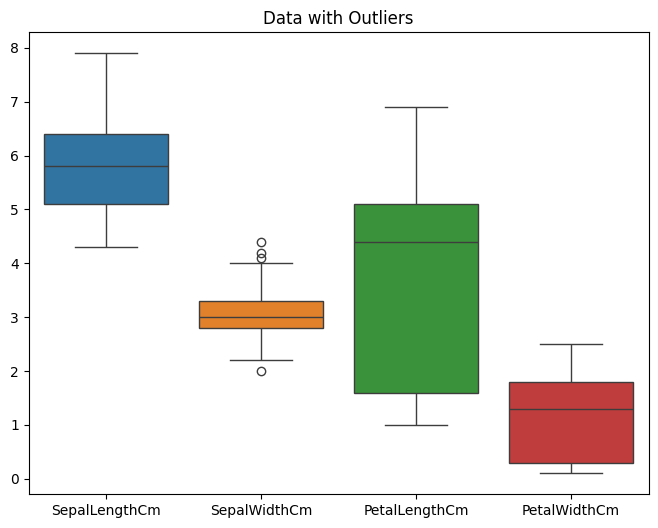

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris)
plt.title("Data with Outliers")
plt.show()

Seperating Features and target columns:

In [ ]:
x = iris.drop(["Species"], axis=1)
y = iris["Species"]
print(x.shape)
print(y.shape)

(147, 4)
(147,)


Train-Test-Split:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(110, 4)
(37, 4)
(110,)
(37,)


Model Importing:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Training data on model:

In [ ]:
m1 = KNeighborsClassifier()
m1.fit(x_train,y_train)

KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

Checking whether model is overfitted:

In [ ]:
print("Train Score : ", m1.score(x_train,y_train))
print("Test Score : ", m1.score(x_test,y_test))

Train Score :  0.990909090909091
Test Score :  0.9459459459459459


Checking whether model is performing well or not:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
ypred = m1.predict(x_test)
ypred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica'], dtype=object)

Evaluating the model:

In [ ]:
def eval_model(ytest,ypred):
    print("Confusion Matrix : \n",confusion_matrix(ytest,ypred))
    print("Classification Report : \n",classification_report(ytest,ypred))
eval_model(y_test,ypred)

Confusion Matrix : 
 [[14  0  0]
 [ 0  9  1]
 [ 0  1 12]]
Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37



Testing the model:

In [ ]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']
